In [112]:
#import pandas_profiling as pp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,log_loss
from sklearn import metrics
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegressionCV
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
plt.style.use('fivethirtyeight')
import matplotlib.ticker as mtick

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 250)
pd.set_option('display.min_rows', 100)
pd.set_option('display.max_columns', 30)

In [30]:
df = pd.read_csv('hr-data.csv')

In [31]:
df.columns

Index(['id', 'satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'churn',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

In [32]:
df.shape

(14999, 11)

In [33]:
df.head()

,id,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,churn,promotion_last_5years,sales,salary
0,0,0.38,0.53,2,157,3,0,1,0,sales,low
1,1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,3,0.72,0.87,5,223,5,0,1,0,sales,low
4,4,0.37,0.52,2,159,3,0,1,0,sales,low


In [34]:
df.dtypes

id                         int64
satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
churn                      int64
promotion_last_5years      int64
sales                     object
salary                    object
dtype: object

In [35]:
#check unique values for each variable
df_cols = list(df.columns)
for num in df_cols:
    print(f'{num}: {df[num].nunique()}')

id: 14999
satisfaction_level: 92
last_evaluation: 65
number_project: 6
average_montly_hours: 215
time_spend_company: 8
Work_accident: 2
churn: 2
promotion_last_5years: 2
sales: 10
salary: 3


In [36]:
df.info()

#There are no empty rows; check object type columns
#HR Dept has all their personal and employment data on file

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 11 columns):
id                       14999 non-null int64
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
churn                    14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(7), object(2)
memory usage: 1.3+ MB


In [37]:
print(df[df['sales']==''].count())
print('\n')
print(df[df['salary']==''].count())

#There are no empty strings

id                       0
satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
churn                    0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64


id                       0
satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
churn                    0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64


In [38]:
df = df.drop_duplicates()

In [39]:
df.shape

(14999, 11)

In [40]:
df.describe()

,id,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,churn,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7499.000000,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,4329.982679,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.000000,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,3749.500000,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,7499.000000,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,11248.500000,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,14998.000000,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11fa574e0>,
      dtype=object)

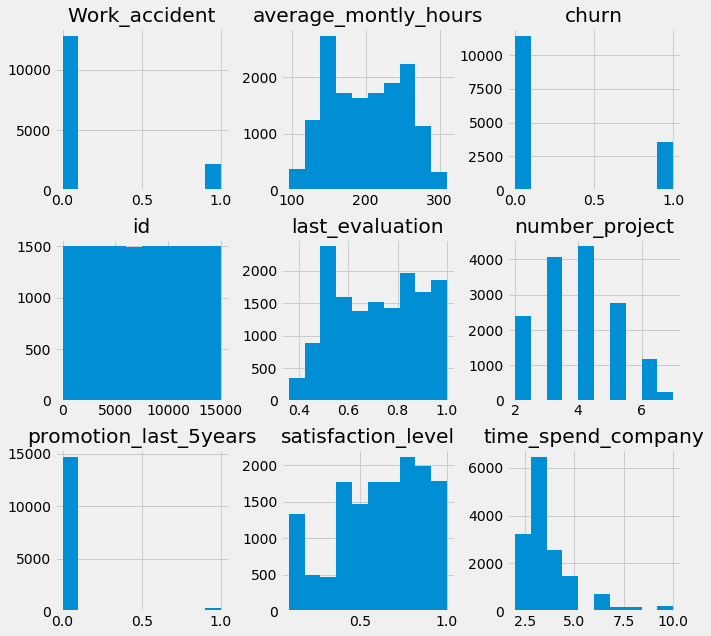

In [41]:
df.hist(figsize=(10,10))

In [42]:
#id is likely to be a unique identifier for all employees
#not many promotions in the last 5 years
#slight left skew is satisfaction level
#heavy right skew in time_spend_company

In [43]:
df.shape

(14999, 11)

In [44]:
#Lets understand what a row represents
df.groupby(['salary','sales','number_project','time_spend_company','satisfaction_level','average_montly_hours','last_evaluation','Work_accident','churn','promotion_last_5years']).count().shape

#for this case going to use id to represent a row 
#grouped by every variable and the most is 11991
# this means there are multiple employees in this company which share similar HR information

(11991, 1)

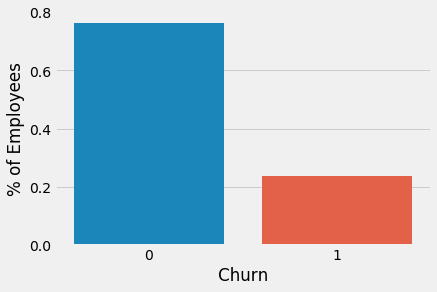

In [45]:
#df['churn'].value_counts(normalize=True)
df_churn = df['churn'].value_counts(normalize=True).to_frame().reset_index()
df_churn.columns=['Churn', '% of Employees']
g = sns.barplot(x='Churn',y='% of Employees', data = df_churn)
#for index, row in df_churn.iterrows():
#    g.text(row.name,row['Churn'], round(row['% of Employees'],2), color='black', ha="center")

#We see this is an imbalanced class problem. Indeed, the percentage of Current Employees in our dataset is 76% 
#and the percentage of Ex-employees is: 24%.
#Machine learning algorithms typically work best when the number of instances of each classes are roughly equal.
#We will have to address this target feature imbalance prior to implementing our Machine Learning algorithms.


Average satisfaction level for non-churners: 0.67
Average satisfaction level for churners: 0.44


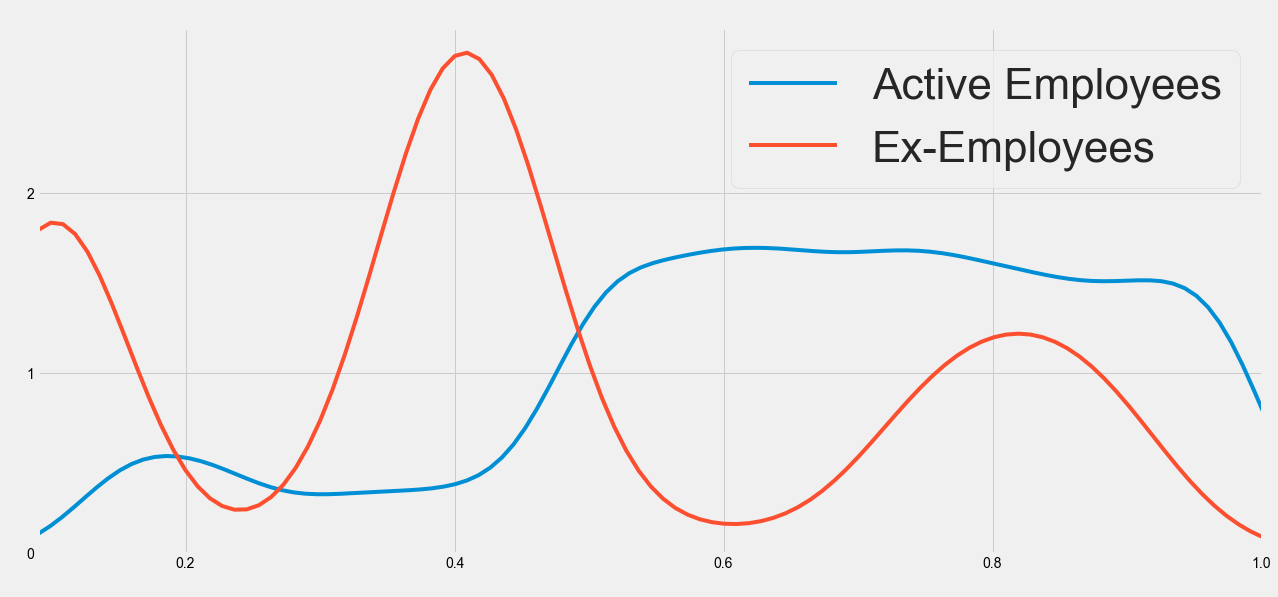

In [46]:
print('Average satisfaction level for non-churners: {:.2f}'.format(df[df['churn']==0]['satisfaction_level'].mean()))
print('Average satisfaction level for churners: {:.2f}'.format(df[df['churn']==1]['satisfaction_level'].mean()))
fig, axes = plt.subplots(figsize=(20, 10))
plt.gcf().subplots_adjust(bottom=0.15,left=0.1)

sns.set(font_scale = 4)
plt.style.use('fivethirtyeight')
sns.kdeplot(df.loc[df['churn']==0, 'satisfaction_level'],label='Active Employees')
sns.kdeplot(df.loc[df['churn']==1, 'satisfaction_level'],label='Ex-Employees')
plt.xlim(left=df['satisfaction_level'].min(), right=df['satisfaction_level'].max())
plt.xlabel(' ')
plt.ylabel(' ')
plt.title(' ');

#Non-churners have higher satisfaction levels
#Churners peak at 0.09,0.4,0.8 
#fig.savefig('kde_satisfaction_level', transparent=True)

Average average_montly_hours for non-churners: 199.06
Average average_montly_hours for churners: 207.42


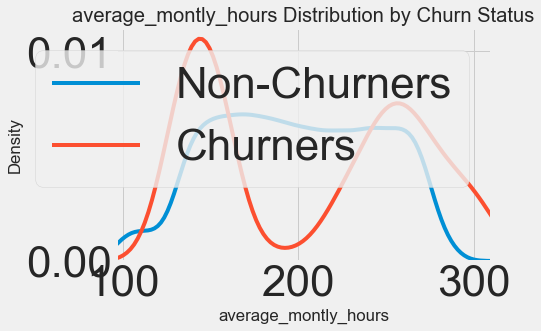

In [47]:
print('Average average_montly_hours for non-churners: {:.2f}'.format(df[df['churn']==0]['average_montly_hours'].mean()))
print('Average average_montly_hours for churners: {:.2f}'.format(df[df['churn']==1]['average_montly_hours'].mean()))
sns.kdeplot(df.loc[df['churn']==0, 'average_montly_hours'],label='Non-Churners')
sns.kdeplot(df.loc[df['churn']==1, 'average_montly_hours'],label='Churners')
plt.xlim(left=df['average_montly_hours'].min(), right=df['average_montly_hours'].max())
plt.xlabel('average_montly_hours')
plt.ylabel('Density')
plt.title('average_montly_hours Distribution by Churn Status');


Average last evaluation for non-churners: 0.72
Average last evaluation for churners: 0.72


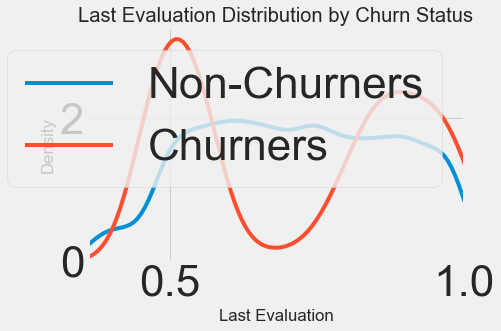

In [48]:
print('Average last evaluation for non-churners: {:.2f}'.format(df[df['churn']==0]['last_evaluation'].mean()))
print('Average last evaluation for churners: {:.2f}'.format(df[df['churn']==1]['last_evaluation'].mean()))
sns.kdeplot(df.loc[df['churn']==0, 'last_evaluation'],label='Non-Churners')
sns.kdeplot(df.loc[df['churn']==1, 'last_evaluation'],label='Churners')
plt.xlim(left=df['last_evaluation'].min(), right=df['last_evaluation'].max())
plt.xlabel('Last Evaluation')
plt.ylabel('Density')
plt.title('Last Evaluation Distribution by Churn Status');

Average number_project for non-churners: 3.79
Average number_project for churners: 3.86


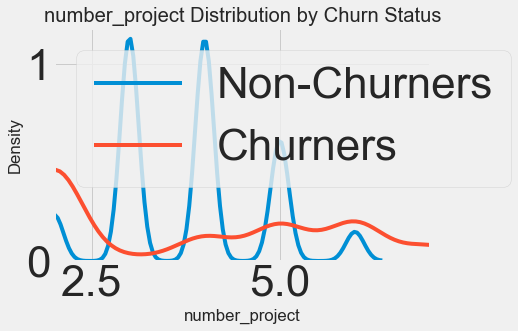

In [49]:
print('Average number_project for non-churners: {:.2f}'.format(df[df['churn']==0]['number_project'].mean()))
print('Average number_project for churners: {:.2f}'.format(df[df['churn']==1]['number_project'].mean()))
sns.kdeplot(df.loc[df['churn']==0, 'number_project'],label='Non-Churners')
sns.kdeplot(df.loc[df['churn']==1, 'number_project'],label='Churners')
plt.xlim(left=df['number_project'].min(), right=df['number_project'].max())
plt.xlabel('number_project')
plt.ylabel('Density')
plt.title('number_project Distribution by Churn Status');

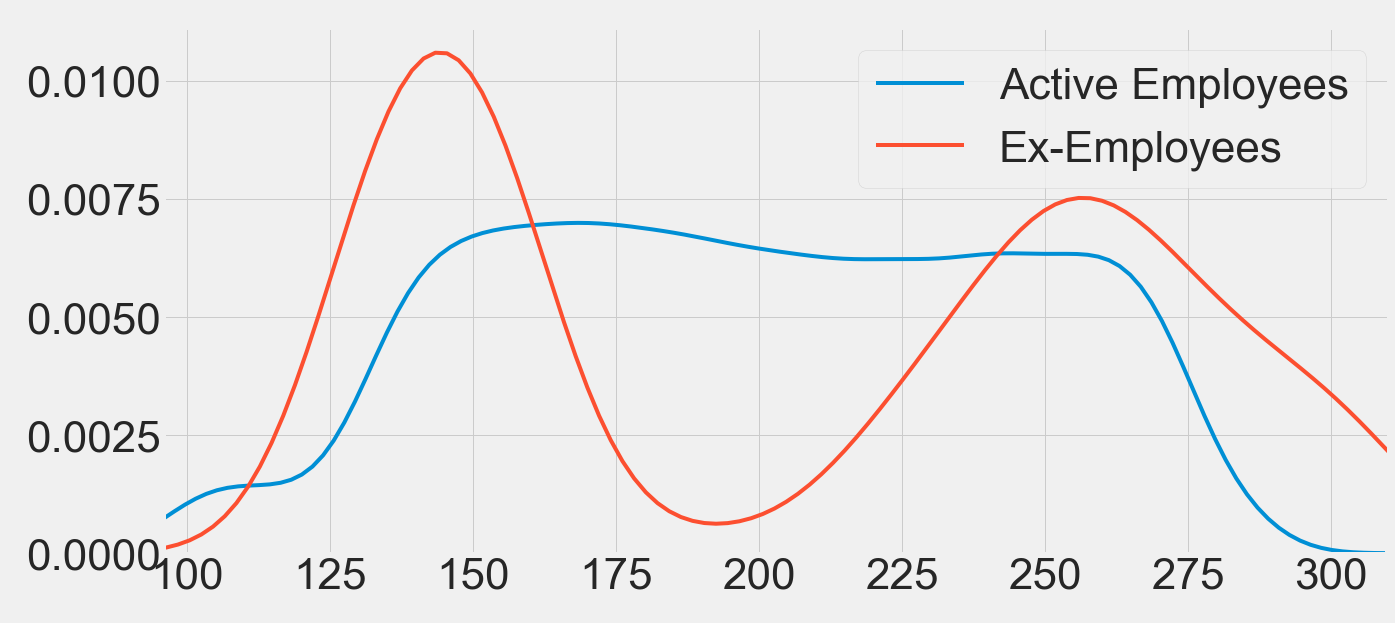

In [50]:
fig, axes = plt.subplots(figsize=(20, 10))
plt.gcf().subplots_adjust(bottom=0.15,left=0.1)

sns.set(font_scale = 4)
plt.style.use('fivethirtyeight')
sns.kdeplot(df.loc[df['churn']==0, 'average_montly_hours'],label='Active Employees')
sns.kdeplot(df.loc[df['churn']==1, 'average_montly_hours'],label='Ex-Employees')
plt.xlim(left=df['average_montly_hours'].min(), right=df['average_montly_hours'].max())

#axes.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0,decimals=0))

plt.xlabel(' ')
plt.ylabel(' ')
plt.title(' ');


#Non-churners have higher satisfaction levels
#Churners peak at 0.09,0.4,0.8 
# fig.savefig('kde_average_hours', transparent=True)

Average time_spend_company for non-churners: 3.38
Average time_spend_company for churners: 3.88


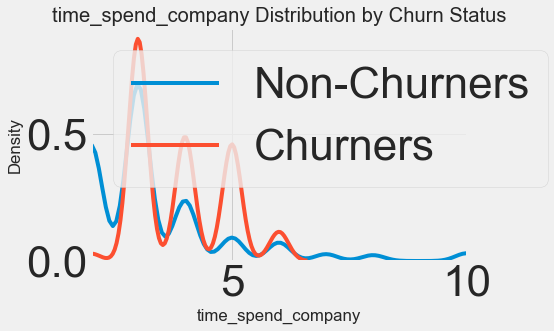

In [51]:
print('Average time_spend_company for non-churners: {:.2f}'.format(df[df['churn']==0]['time_spend_company'].mean()))
print('Average time_spend_company for churners: {:.2f}'.format(df[df['churn']==1]['time_spend_company'].mean()))
sns.kdeplot(df.loc[df['churn']==0, 'time_spend_company'],label='Non-Churners')
sns.kdeplot(df.loc[df['churn']==1, 'time_spend_company'],label='Churners')
plt.xlim(left=df['time_spend_company'].min(), right=df['time_spend_company'].max())
plt.xlabel('time_spend_company')
plt.ylabel('Density')
plt.title('time_spend_company Distribution by Churn Status');


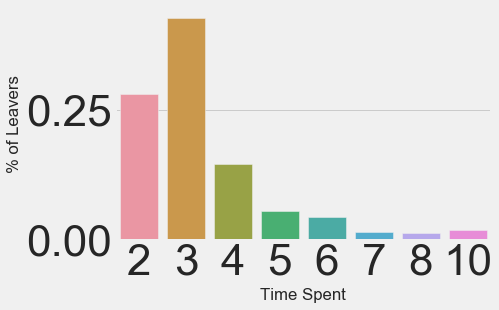

In [52]:
df_time_comp = df[df['churn']==0]['time_spend_company'].value_counts(normalize=True).to_frame().reset_index()
df_time_comp.columns=['Time Spent', '% of Leavers']
sns.barplot(x='Time Spent',y='% of Leavers', data = df_time_comp)


In [53]:
df.groupby('time_spend_company')['id'].count()

time_spend_company
2     3244
3     6443
4     2557
5     1473
6      718
7      188
8      162
10     214
Name: id, dtype: int64

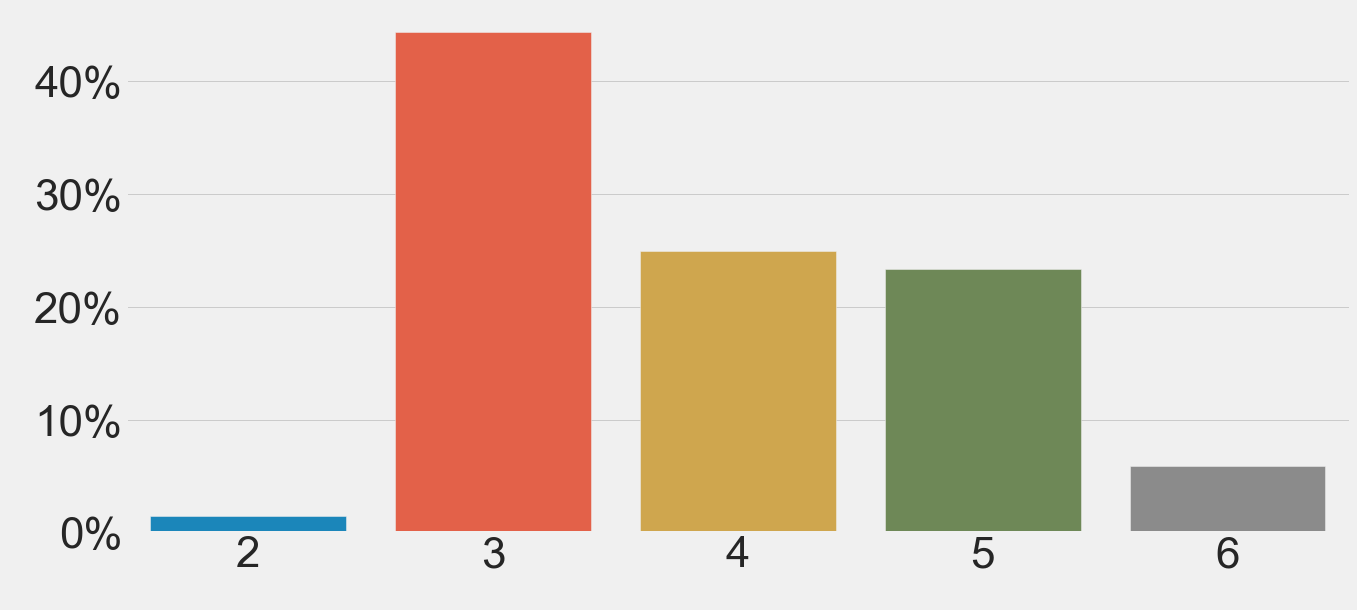

In [54]:
import matplotlib.ticker as mtick

df_time_comp = df[df['churn']==1]['time_spend_company'].value_counts(normalize=True).to_frame().reset_index()
df_time_comp.columns=['Time Spent', '% of Leavers']

fig, axes = plt.subplots(figsize=(20, 10))
plt.gcf().subplots_adjust(bottom=0.15,left=0.1)

sns.set(font_scale = 4)
plt.style.use('fivethirtyeight')

sns.barplot(x='Time Spent',y='% of Leavers', data = df_time_comp)

axes.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0,decimals=0))


#The plot below indicates a negative correlation with the salary type of an employee and the Attrition Status. 
#In other words, employees with higher salary are less likely to leave.
plt.xlabel(' ', fontsize=24)
plt.ylabel(' ', fontsize=24)

# fig.savefig('leavers_time_spent', transparent=True)

In [55]:
print(df['Work_accident'].value_counts(normalize=True))
print(df[df['churn']==0]['Work_accident'].value_counts(normalize=True))
print(df[df['churn']==1]['Work_accident'].value_counts(normalize=True))

0    0.85539
1    0.14461
Name: Work_accident, dtype: float64
0    0.824991
1    0.175009
Name: Work_accident, dtype: float64
0    0.952674
1    0.047326
Name: Work_accident, dtype: float64


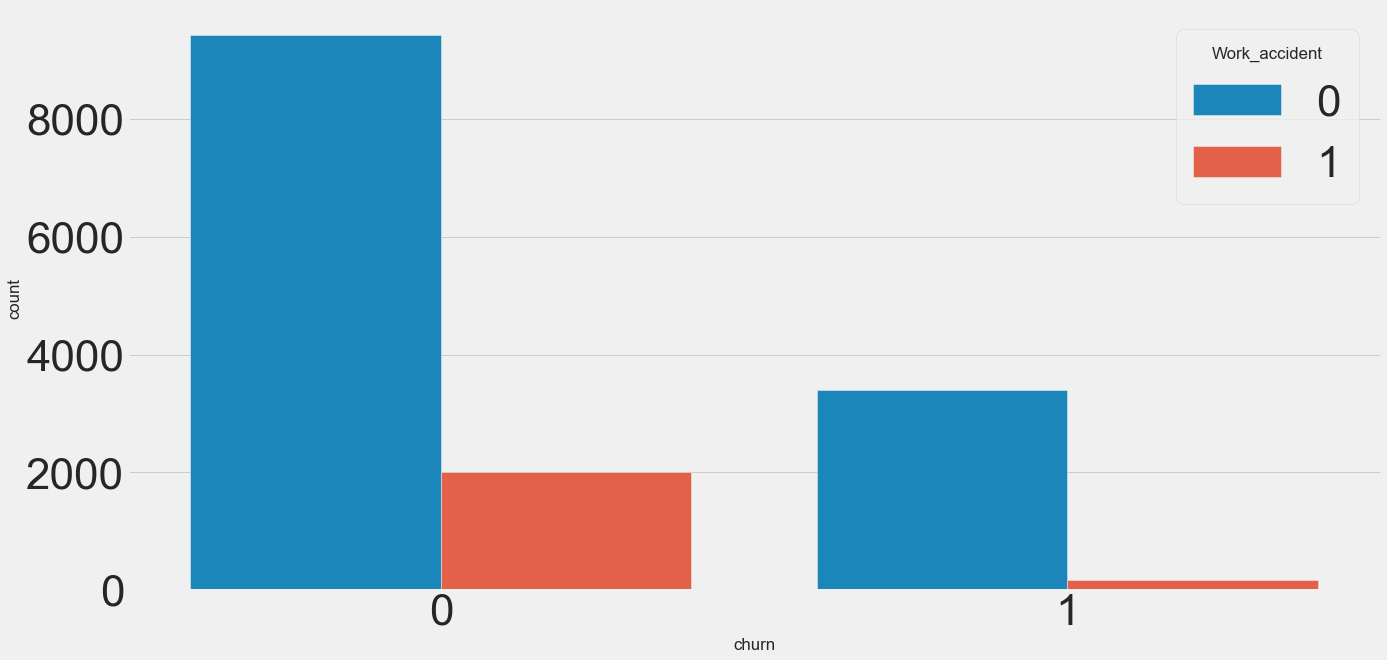

In [56]:
fig, axes = plt.subplots(figsize=(20, 10))
sns.countplot(x = 'churn', hue = 'Work_accident',data=df)

In [57]:
print(df['churn'].value_counts(normalize=True))
#class imbalance! have to scale

0    0.761917
1    0.238083
Name: churn, dtype: float64


In [58]:
print(df['promotion_last_5years'].value_counts(normalize=True))
print(df[df['churn']==0]['promotion_last_5years'].value_counts(normalize=True))
print(df[df['churn']==1]['promotion_last_5years'].value_counts(normalize=True))

#people who churned had little to no promotions 

0    0.978732
1    0.021268
Name: promotion_last_5years, dtype: float64
0    0.973749
1    0.026251
Name: promotion_last_5years, dtype: float64
0    0.994679
1    0.005321
Name: promotion_last_5years, dtype: float64


In [59]:
df.groupby('time_spend_company')['promotion_last_5years'].sum()

time_spend_company
2      54
3     134
4      35
5      17
6      17
7      36
8      10
10     16
Name: promotion_last_5years, dtype: int64

In [60]:
print(df['sales'].value_counts(normalize=True))
print(df[df['churn']==0]['sales'].value_counts(normalize=True))
print(df[df['churn']==1]['sales'].value_counts(normalize=True))

#similar roles throughout

sales          0.276018
technical      0.181345
support        0.148610
IT             0.081805
product_mng    0.060137
marketing      0.057204
RandD          0.052470
accounting     0.051137
hr             0.049270
management     0.042003
Name: sales, dtype: float64
sales          0.273539
technical      0.177021
support        0.146482
IT             0.083479
product_mng    0.061603
RandD          0.058278
marketing      0.057315
accounting     0.049265
management     0.047165
hr             0.045852
Name: sales, dtype: float64
sales          0.283954
technical      0.195183
support        0.155419
IT             0.076449
hr             0.060207
accounting     0.057127
marketing      0.056847
product_mng    0.055447
RandD          0.033884
management     0.025483
Name: sales, dtype: float64


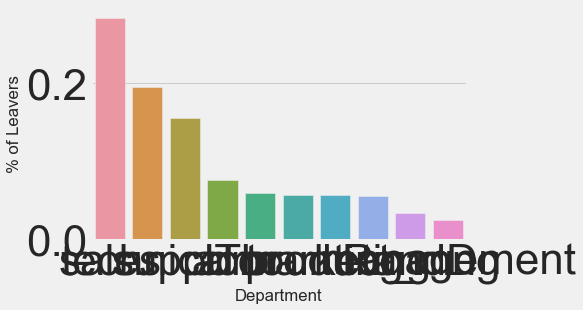

In [61]:
df_DeptField = df[df['churn']==1]['sales'].value_counts(normalize=True).to_frame().reset_index()
df_DeptField.columns=['Department', '% of Leavers']
sns.barplot(x='Department',y='% of Leavers', data = df_DeptField)

#remove x-axis labels and make a legend 

In [62]:
print(df['salary'].value_counts(normalize=False))
print(df[df['churn']==0]['salary'].value_counts(normalize=True))
print(df[df['churn']==1]['salary'].value_counts(normalize=True))

#more lower salaries for people who churned

low       7316
medium    6446
high      1237
Name: salary, dtype: int64
low       0.450123
medium    0.448810
high      0.101068
Name: salary, dtype: float64
low       0.608233
medium    0.368804
high      0.022963
Name: salary, dtype: float64


In [63]:
df.groupby('churn')['id'].count()


churn
0    11428
1     3571
Name: id, dtype: int64

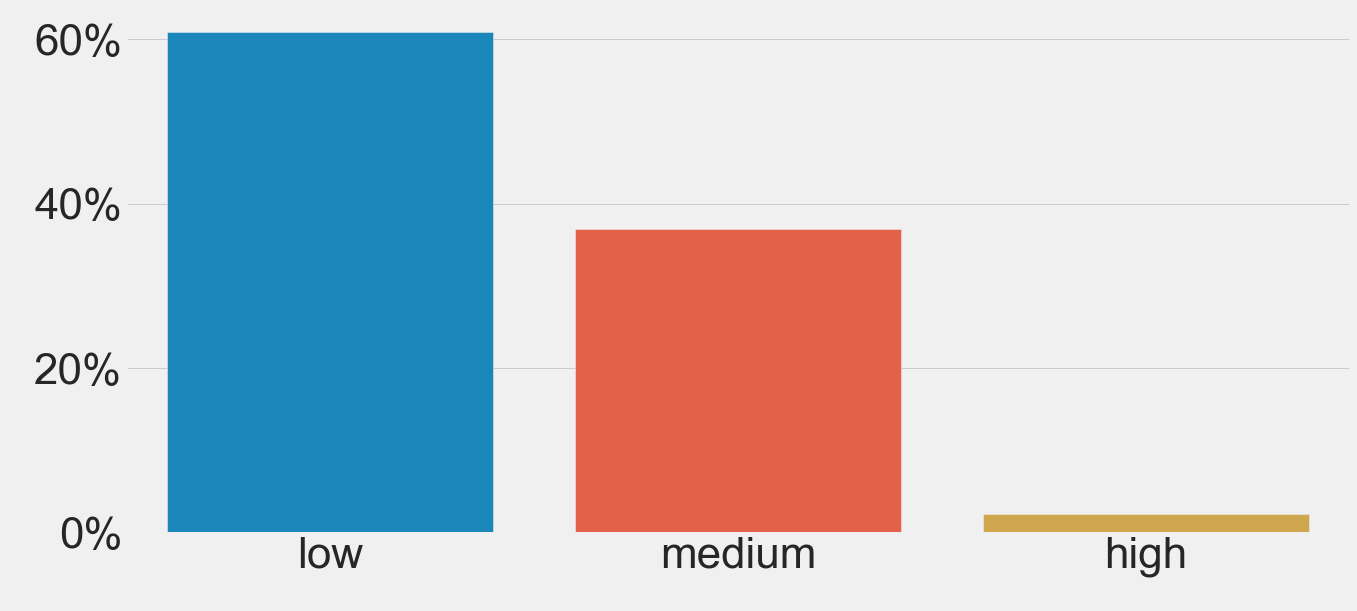

In [64]:
fig, axes = plt.subplots(figsize=(20, 10))
plt.gcf().subplots_adjust(bottom=0.15,left=0.1)

df_sal = df[df['churn']==1]['salary'].value_counts(normalize=True).to_frame().reset_index()
df_sal.columns=['Salary', '% of Leavers']
sns.set(font_scale = 4)
plt.style.use('fivethirtyeight')

sns.barplot(x='Salary',y='% of Leavers', data = df_sal)
axes.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))


#The plot below indicates a negative correlation with the salary type of an employee and the Attrition Status. 
#In other words, employees with higher salary are less likely to leave.
plt.xlabel(' ', fontsize=24)
plt.ylabel(' ', fontsize=24)

# fig.savefig('leavers_salary', transparent=True)

In [65]:
# Find correlations with the target and sort
df_copy = df.copy()
df_copy['Target'] = df['churn']
df_copy = df_copy.drop(['id','churn'],axis=1)
correlations = df_copy.corr()['Target'].sort_values()
print('Most Positive Correlations: \n', correlations.tail(5))
print('\nMost Negative Correlations: \n', correlations.head(5))

#worth remembering that correlation coefficients only measure linear correlations

Most Positive Correlations: 
 last_evaluation         0.006567
number_project          0.023787
average_montly_hours    0.071287
time_spend_company      0.144822
Target                  1.000000
Name: Target, dtype: float64

Most Negative Correlations: 
 satisfaction_level      -0.388375
Work_accident           -0.154622
promotion_last_5years   -0.061788
last_evaluation          0.006567
number_project           0.023787
Name: Target, dtype: float64


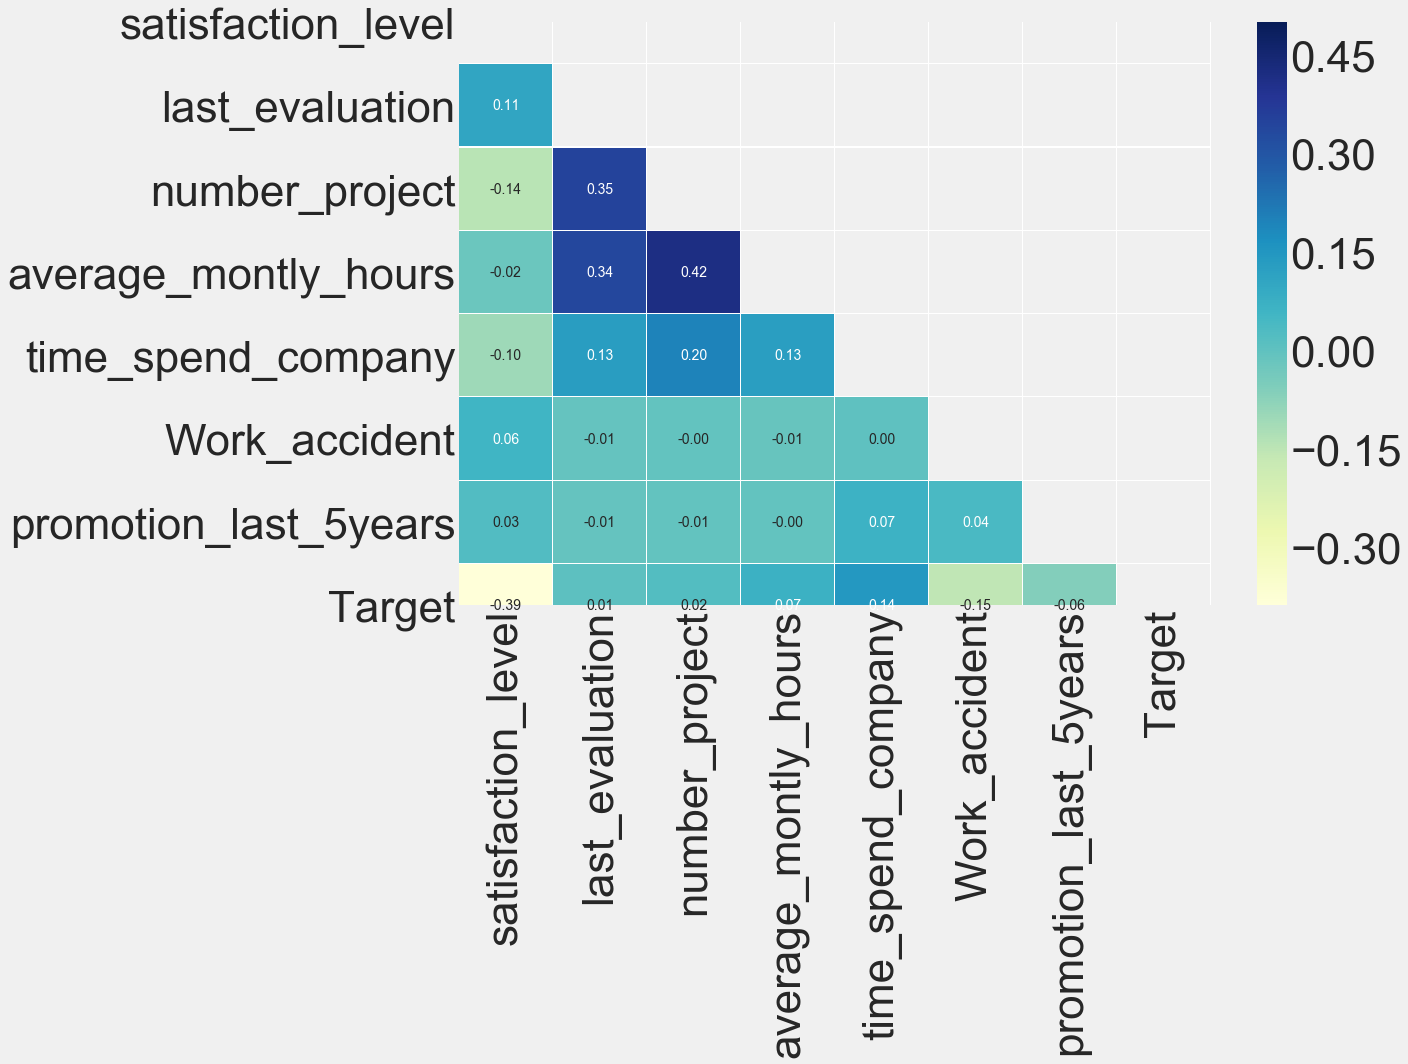

In [66]:
# Calculate correlations
corr = df_copy.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
# Heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr,
            vmax=.5,
            mask=mask,
            annot=True, fmt='.2f',
            linewidths=.2, cmap="YlGnBu")

#Satisfaction level, work accident, promotion are negatively correlated
#Average monthly hours, time spent at company are positively correlated 

<Figure size 432x288 with 0 Axes>

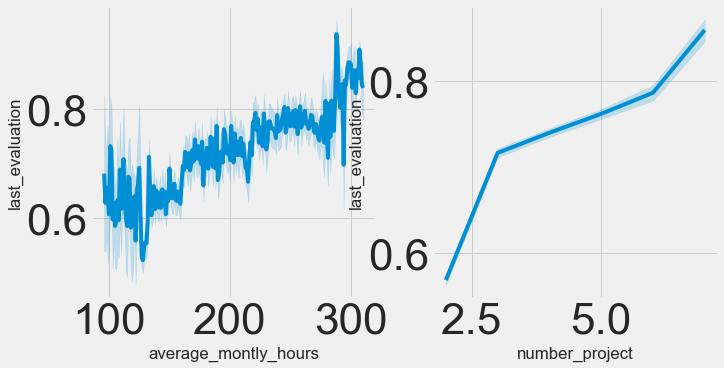

In [67]:
plt.tight_layout()
fig, axes = plt.subplots(1,2,figsize=(10, 5))
sns.lineplot(x='average_montly_hours',y= 'last_evaluation',data=df,ax=axes[0]) 
sns.lineplot(x='number_project',y= 'last_evaluation', data=df,ax=axes[1]) 

EDA Summary
- The dataset does not feature any missing or erroneous data values, and all features are of the correct data type
- The strongest positive correlations with the target features are: number_project, average_montly_hours, time_spend_company 
- The strongest negative correlations with the target features are: satisfaction_level, Work_accident, promotion_last_5years
- The dataset is imbalanced with the majoriy of observations describing non-churners (76%) vs churners (24%)
- Features (ie columns)redundant for our analysis: id

Other observations:
- Churners have lower satisfaction levels
- Churners have more projects
- People who churned had little to no promotions 
- Majority of churners are in the sales dept.
- Majority of churners have a low salary

In [68]:
print(df.shape) #11 columns
df.head()

(14999, 11)


,id,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,churn,promotion_last_5years,sales,salary
0,0,0.38,0.53,2,157,3,0,1,0,sales,low
1,1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,3,0.72,0.87,5,223,5,0,1,0,sales,low
4,4,0.37,0.52,2,159,3,0,1,0,sales,low


In [69]:
df.columns[1:]

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'churn',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

In [70]:
# le = LabelEncoder()
# # Label Encoding will be used for columns with 2 or less unique values
# le_count = 0
# for col in df.columns[1:]:
#     if df[col].dtype == 'object':
#         if len(list(df[col].unique())) <= 2:
#             le.fit(df[col])
#             df[col] = le.transform(df[col])
#             le_count += 1
# print('{} columns were label encoded.'.format(le_count))

In [71]:
#Machine Learning algorithms can typically only have numerical values as their predictor variables. 
#Hence Label Encoding becomes necessary as they encode categorical labels with numerical values. 
#To avoid introducing feature importance for categorical features with large numbers of unique values, 
#we will use dummy variables
df = pd.get_dummies(df) #drop_first=True)


In [72]:
print(df.shape) #22 columns
df.head()

(14999, 22)


,id,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,churn,promotion_last_5years,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium
0,0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,1,0.80,0.86,5,262,6,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,2,0.11,0.88,7,272,4,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [73]:
df.columns

Index(['id', 'satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'churn',
       'promotion_last_5years', 'sales_IT', 'sales_RandD', 'sales_accounting',
       'sales_hr', 'sales_management', 'sales_marketing', 'sales_product_mng',
       'sales_sales', 'sales_support', 'sales_technical', 'salary_high',
       'salary_low', 'salary_medium'],
      dtype='object')

In [74]:
#Setting what the categorical, numerical, and target variables are
categorical_variables = [
    'Work_accident',
    'promotion_last_5years',
    'sales_IT', 'sales_RandD', 'sales_accounting',
       'sales_hr', 'sales_management', 'sales_marketing', 'sales_product_mng',
       'sales_sales', 'sales_support', 'sales_technical', 'salary_high',
       'salary_low', 'salary_medium'
]
numerical_variables = [
    'satisfaction_level',
    'last_evaluation',
    'number_project',
    'average_montly_hours',
    'time_spend_company',
]
hi_corr_vars = [
    'average_montly_hours',  
    'salary_low',              
    'time_spend_company',    
    'satisfaction_level',      
    'Work_accident',           
    'salary_high',             
    'salary_medium',          
    'promotion_last_5years'   
]
rfe_vars = [
    'satisfaction_level',
    'Work_accident',
    'promotion_last_5years',
    'sales_RandD',
    'salary_high',
    'sales_hr',
    'sales_management',
    'salary_low'
]
target = ['Target']

#numerical variables are better features as model performs better 
#highly correlated variables are better than RFE

In [75]:
#Set variables
#X = df.drop(columns=['id','churn'])
y = df[['churn']]
X = df[hi_corr_vars]
#train validation data split
X_train, X_val, y_train, y_val = train_test_split(X,
                                                  y,
                                                  test_size = 0.2,
                                                  random_state = 42)

#Feature Scaling using Scaler essentially removing the mean and scaling to unit variance. 
#Machine Learning algorithms perform better when input numerical variables fall within a similar scale. 

#Scale model 
scaler = StandardScaler()
#fit scaler
scaler.fit(X_train)
#transform the data
X_train_scale = scaler.transform(X_train)
X_val_scale = scaler.transform(X_val)

In [76]:
y_train['churn'].value_counts(normalize=True)

0    0.76123
1    0.23877
Name: churn, dtype: float64

In [77]:
y_val['churn'].value_counts(normalize=True)

#maintained the same churn ration when split testing data

0    0.764667
1    0.235333
Name: churn, dtype: float64

In [78]:
# Feature extraction
model = LogisticRegression()
rfe = RFE(model, 8)
fit = rfe.fit(X, y)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))
list(zip(X.columns,fit.ranking_))

Num Features: 8
Selected Features: [ True  True  True  True  True  True  True  True]
Feature Ranking: [1 1 1 1 1 1 1 1]


/Users/gthorani/venv/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/Users/gthorani/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



[('average_montly_hours', 1),
 ('salary_low', 1),
 ('time_spend_company', 1),
 ('satisfaction_level', 1),
 ('Work_accident', 1),
 ('salary_high', 1),
 ('salary_medium', 1),
 ('promotion_last_5years', 1)]

In [79]:
#Set model (Going to be using the same data as model 3)
clf = LogisticRegression(penalty = 'l1',
                         solver='saga',
                         class_weight='balanced',
                         max_iter=1000, #changed interations from default=100
                         random_state=42,
                         C=1)
clf.fit(X_train_scale,y_train)

/Users/gthorani/venv/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



LogisticRegression(C=1, class_weight='balanced', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=42, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [80]:
probs = clf.predict_proba(X_val_scale) # predict probabilities
#probs = probs[:, 1] # we will only keep probabilities associated with the employee leaving

In [81]:
probs = probs[:,1:2]

In [82]:
probs.mean()

0.4215370352098654

In [83]:
probs.max()

0.9861614757282209

In [84]:
probs.min()

0.005243040188158934

In [85]:
probs_df = pd.DataFrame(probs,columns = ['Probabilities'])


In [86]:
probs_df[probs_df['Probabilities'] < .50].count()

Probabilities    1872
dtype: int64

In [87]:
probs_df[(probs_df['Probabilities'] > .50) & (probs_df['Probabilities'] < .80)].count()

Probabilities    784
dtype: int64

In [88]:
probs_df[probs_df['Probabilities'] > .80].count()

Probabilities    344
dtype: int64

In [89]:
clf.class_weight

'balanced'

In [90]:
clf.classes_

array([0, 1])

In [91]:
clf.coef_.round(2)

array([[ 0.05,  0.25,  0.58, -1.  , -0.53, -0.43, -0.  , -0.22]])

In [92]:
y_train_pred_scale = clf.predict(X_train_scale) 
y_val_pred_scale = clf.predict(X_val_scale)

In [93]:
confusion_matrix(y_train,y_train_pred_scale)

array([[6792, 2342],
       [ 600, 2265]])

In [94]:
confusion_matrix(y_val,y_val_pred_scale)

array([[1723,  571],
       [ 149,  557]])

In [95]:
print(metrics.classification_report(y_train,y_train_pred_scale))

              precision    recall  f1-score   support

           0       0.92      0.74      0.82      9134
           1       0.49      0.79      0.61      2865

    accuracy                           0.75     11999
   macro avg       0.71      0.77      0.71     11999
weighted avg       0.82      0.75      0.77     11999



In [96]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[6792 2342]
 [ 600 2265]]


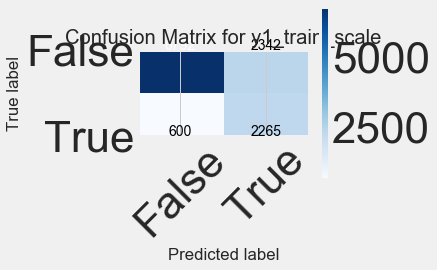

In [97]:
plot_confusion_matrix(confusion_matrix(y_train, y_train_pred_scale),
                      [False, True],
                      title = 'Confusion Matrix for y1_train_scale')

Confusion matrix, without normalization
[[1723  571]
 [ 149  557]]


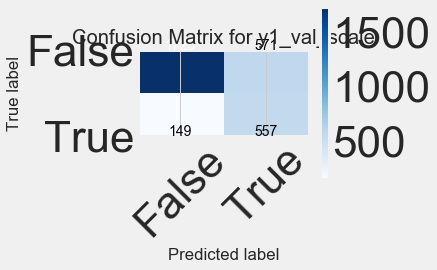

In [98]:
plot_confusion_matrix(confusion_matrix(y_val, y_val_pred_scale),
                      [False, True],
                      title = 'Confusion Matrix for y1_val_scale')

#568 TP, 572 FP, 1722 TN, 138(4.6%) FN
#The ideal scenario that we all want is that the model should give 0 False Positives and 0 False Negatives
#Model classifying things incorrectly as compared to the actual class
#In this business case we want to minimize FN

In [99]:
#Log loss of X_train
log_loss(y_train,clf.predict_proba(X_train_scale))

0.5457351722118393

In [100]:
#Log loss of X_val
log_loss(y_val,clf.predict_proba(X_val_scale))

0.5554067286929001

In [101]:
print(accuracy_score(y_train,y_train_pred_scale))
print(accuracy_score(y_val,y_val_pred_scale))

#high accuracy score because by default already having a lot of low probabilities because of the inbalance

0.7548129010750896
0.76


In [102]:
print(precision_score(y_train,y_train_pred_scale))
print(precision_score(y_val,y_val_pred_scale))

0.4916431517256349
0.49379432624113473


In [103]:
print(recall_score(y_train,y_train_pred_scale))
print(recall_score(y_val,y_val_pred_scale))

0.7905759162303665
0.7889518413597734


In [104]:
print(f1_score(y_train,y_train_pred_scale))
print(f1_score(y_val,y_val_pred_scale))

0.6062633832976445
0.6074154852780806


In [105]:
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=12, random_state=42)
print(cross_val_score(clf, X, y, cv=cv, scoring='accuracy').mean())
print(cross_val_score(clf, X, y, cv=cv, scoring='recall').mean())
print(cross_val_score(clf, X, y, cv=cv, scoring='precision').mean())
print(cross_val_score(clf, X, y, cv=cv, scoring='f1').mean())
#sorted(sklearn.metrics.SCORERS.keys())
# 0.7736604733057003
# 0.8037204633960786
# 0.61529054598928

/Users/gthorani/venv/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/Users/gthorani/venv/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/Users/gthorani/venv/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/Users/gthorani/venv/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/Users/gthorani/venv/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the s

0.7579004135469313


/Users/gthorani/venv/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/Users/gthorani/venv/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/Users/gthorani/venv/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/Users/gthorani/venv/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/Users/gthorani/venv/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/Users/gthorani/

0.8037204633960786


/Users/gthorani/venv/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/Users/gthorani/venv/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/Users/gthorani/venv/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/Users/gthorani/venv/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/Users/gthorani/venv/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/Users/gthorani/

0.5013083376762444


/Users/gthorani/venv/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/Users/gthorani/venv/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/Users/gthorani/venv/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/Users/gthorani/venv/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/Users/gthorani/venv/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/Users/gthorani/

0.61529054598928


/Users/gthorani/venv/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



In [106]:
#As C goes down the list, the regularization power will increase.
alpha_values = []
log_loss_train = []
log_loss_val = []
acc_train = []
acc_val = []
pre_train = []
pre_val = []
rec_train = []
rec_val = []
f1_train = []
f1_val = []
for C in [1/np.power(10, int(n)) for n in range(0, 7)]:
    clf = LogisticRegression(penalty = 'l1',
                         solver='saga',
                         class_weight='balanced',
                         max_iter=10000, #changed interations from default=100
                         random_state=42,
                         C= C)
    clf.fit(X_train_scale,y_train)
    y_train_pred_scale = clf.predict(X_train_scale) 
    y_val_pred_scale = clf.predict(X_val_scale)
    alpha_values.append(C)
    #Log loss
    log_loss_train.append(log_loss(y_train,clf.predict_proba(X_train_scale)))
    log_loss_val.append(log_loss(y_val,clf.predict_proba(X_val_scale)))
    
    #Accuracy Score
    acc_train.append(accuracy_score(y_train,y_train_pred_scale))
    acc_val.append(accuracy_score(y_val,y_val_pred_scale))
    
    #Precision Score
    pre_train.append(precision_score(y_train,y_train_pred_scale))
    pre_val.append(precision_score(y_val,y_val_pred_scale))
    
    #Recall Score
    rec_train.append(recall_score(y_train,y_train_pred_scale))
    rec_val.append(recall_score(y_val,y_val_pred_scale))
    
    #F1 Score
    f1_train.append(f1_score(y_train,y_train_pred_scale))
    f1_val.append(f1_score(y_val,y_val_pred_scale))
#high accuracy score because by default already having a lot of low probabilities because of the inbalance
    
# higher penalization for values...kind of like MSE - want it to be small - log loss
#high accuracy score because by default already having a lot of low probabilities because of the inbalance
#Can use regularization with logistic regression

/Users/gthorani/venv/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/Users/gthorani/venv/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/Users/gthorani/venv/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/Users/gthorani/venv/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/Users/gthorani/venv/lib/python3.7/site-

In [107]:
scores =  list(zip(alpha_values, log_loss_train, log_loss_val,acc_train,acc_val,pre_train,pre_val,
                   rec_train,rec_val,f1_train,f1_val))
scores_df = pd.DataFrame(scores,columns = ['Alpha' , 'log_loss_train', 'log_loss_val','acc_train','acc_val',
                                           'pre_train','pre_val','rec_train','rec_val','f1_train','f1_val'])
scores_df

,Alpha,log_loss_train,log_loss_val,acc_train,acc_val,pre_train,pre_val,rec_train,rec_val,f1_train,f1_val
0,1.000000,0.545735,0.555407,0.754813,0.760000,0.491643,0.493794,0.790576,0.788952,0.606263,0.607415
1,0.100000,0.545524,0.555079,0.754563,0.759333,0.491297,0.492895,0.788133,0.786119,0.605281,0.605895
2,0.010000,0.545170,0.553630,0.749812,0.754667,0.484895,0.486413,0.767539,0.760623,0.594324,0.593370
3,0.001000,0.606061,0.613365,0.722394,0.717333,0.449480,0.437828,0.723560,0.708215,0.554500,0.541126
4,0.000100,0.743138,0.743745,0.238770,0.235333,0.238770,0.235333,1.000000,1.000000,0.385495,0.381004
5,0.000010,0.743454,0.744064,0.238770,0.235333,0.238770,0.235333,1.000000,1.000000,0.385495,0.381004
6,0.000001,0.743454,0.744064,0.238770,0.235333,0.238770,0.235333,1.000000,1.000000,0.385495,0.381004


In [108]:
df.columns

Index(['id', 'satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'churn',
       'promotion_last_5years', 'sales_IT', 'sales_RandD', 'sales_accounting',
       'sales_hr', 'sales_management', 'sales_marketing', 'sales_product_mng',
       'sales_sales', 'sales_support', 'sales_technical', 'salary_high',
       'salary_low', 'salary_medium'],
      dtype='object')

In [109]:
df[df['last_evaluation']>=0.8]['churn'].value_counts(normalize=True)
#people who have high performace from last evaluation churn 10% more 

0    0.696516
1    0.303484
Name: churn, dtype: float64

In [110]:
df[df['last_evaluation']<0.8]['churn'].value_counts(normalize=True)
#people who have high performace from last evaluation 

0    0.802462
1    0.197538
Name: churn, dtype: float64